## UK National Data Repository pipelines data

Login to NDR website [1]  
In the top menu, navigate to __More>Infrastructure>Pipelines__  
Click on the Export button <img src="assets/export.gif" style="display: inline-block; margin: 0" />  
In the popup window select options __Export all data__ and __CSV__, and click the __Export__ button  
save data in file «DealPipelinesKis.csv»


#### References

1. https://ndr.ogauthority.co.uk    


In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv("/home/develop/engineering/data/UK/OGA/NDR_National_Data_Repository/2020-07-27_data_download/DealPipelinesKis.csv")

In [3]:
df.head(3)

,PIPELINE_DTINO,PIPELINE_NAME,OPERATOR,INST_TYPE,FLUID_CONVEYED,PIPELINE_SYSTEM_NAME,DESCRIPTION,STATUS,COMMENTS,DIAMETER,DIAMETER_UNITS,PIPELINE_LENGTH_M,INSULATION_COATING_TYPE,INTERNAL_DIAMETER_MM,OPERATING_PRESSURE_MAX_BARG,WALL_THICKNESS_MM,PIGGY_BUNDLE,PIGGY_BUNDLE_FLAG,ISSUED_DATE,DATA_SOURCE,KP_ORIGIN_CRS,KP_ORIGIN_CRS_DESC,KP_ORIGIN_DESC,KP_ORIGIN_X_LONG,KP_ORIGIN_Y_LAT,NAMING_COMPANY,VERIFIED,QC_FLAG,QC_ISSUE,QC_COMMENTS,START_DATE,END_DATE,REASON_FOR_END,UNTRENCHED_FLAG,EXPOSED_FLAG,DATE_ENTERED,USER_ENTERED,DATE_UPDATED,USER_UPDATED,REASON_UPDATED,EntityKey,PIPELINEID,PIPELINE_STDNAME
0,PL1719,3IN ANASURIA TO COOK MANIFOLD,ITHACA,PIPELINE,GAS,NaN,ANASURIA TO COOK MANIFOLD 3IN GAS LIFT,ACTIVE,,3.0,inch,11854.981797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHELL UK,23090.0,ED_1950_TM_0_N,,NaN,NaN,SHELL UK,,Y,20.0,UPDATED V36 - UPDATED V32 transfered from Shel...,NaN,NaN,,,,07-Aug-2001,REH,18-Jun-2020,SIS_CATALOG,,500004087,500004087,N1156
1,PL1716,8IN ANASURIA TO COOK MANIFOLD,ITHACA,PIPELINE,OIL,NaN,ANASURIA TO COOK MANIFOLD 8IN OIL LINE,ACTIVE,,12.0,inch,11855.868496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHELL UK,23090.0,ED_1950_TM_0_N,,NaN,NaN,SHELL UK,,Y,20.0,UPDATED V36 - UPDATED V32 transfered from Shel...,NaN,NaN,,,,07-Aug-2001,REH,18-Jun-2020,SIS_CATALOG,,500003994,500003994,N1732
2,PL1719,COOK MANIFOLD TO WELL P1 GAS METH,ITHACA,PIPELINE,GAS,NaN,COOK MANIFOLD TO WELL P1 2IN GAS METH,ACTIVE,,2.0,inch,32.941233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHELL UK,23090.0,ED_1950_TM_0_N,,NaN,NaN,SHELL UK,,Y,20.0,UPDATED V36 - UPDATED V32 transfered from Shel...,NaN,NaN,,,,22-Nov-2002,AER,18-Jun-2020,SIS_CATALOG,,500005202,500005202,N1157


In [4]:
print(f"df.shape={df.shape} ")

df.shape=(3596, 43) 


In [5]:
df.dtypes

PIPELINE_DTINO                  object
PIPELINE_NAME                   object
OPERATOR                        object
INST_TYPE                       object
FLUID_CONVEYED                  object
PIPELINE_SYSTEM_NAME            object
DESCRIPTION                     object
STATUS                          object
COMMENTS                        object
DIAMETER                       float64
DIAMETER_UNITS                  object
PIPELINE_LENGTH_M              float64
INSULATION_COATING_TYPE        float64
INTERNAL_DIAMETER_MM           float64
OPERATING_PRESSURE_MAX_BARG    float64
WALL_THICKNESS_MM              float64
PIGGY_BUNDLE                   float64
PIGGY_BUNDLE_FLAG               object
ISSUED_DATE                     object
DATA_SOURCE                     object
KP_ORIGIN_CRS                  float64
KP_ORIGIN_CRS_DESC              object
KP_ORIGIN_DESC                  object
KP_ORIGIN_X_LONG               float64
KP_ORIGIN_Y_LAT                float64
NAMING_COMPANY           

In [6]:
df["INST_TYPE"].value_counts()

PIPELINE         2127
UMBILICAL         889
ANCHOR CABLE      365
MOORING CABLE      81
POWER              78
SPOOL PIECE        35
SEISMIC CABLE      10
RISER               8
TELECOM             3
Name: INST_TYPE, dtype: int64

In [7]:
df["OPERATOR"].value_counts()

SHELL                                    841
BP                                       278
APACHE                                   224
REPSOL SINOPEC                           184
CHRYSAOR                                 176
TOTAL                                    173
ENQUEST HEATHER                          171
PREMIER                                  158
DANA                                     149
CNOOC                                    139
TAQA                                     130
ITHACA                                   118
SPIRIT ENERGY                            117
PERENCO                                  106
CNR                                       67
FAIRFIELD                                 55
HESS                                      52
ENI                                       50
AKERBP ASA                                43
MAERSK                                    41
ANASURIA                                  39
ROCKROSE ENERGY                           30
TEEKAY PET

In [8]:
df["FLUID_CONVEYED"].value_counts()

GAS                   745
OIL                   558
                      338
CHEMICAL              307
WATER                 271
MIXED HYDROCARBONS    223
HYDRAULIC             121
OTHER FLUID           102
CONDENSATE             83
METHANOL               77
FIBRE                  31
OTHER FLUID            29
FIBER                   1
Name: FLUID_CONVEYED, dtype: int64

In [9]:
df["STATUS"].value_counts()

ACTIVE           2449
NOT IN USE        531
REMOVED           258
ABANDONED         158
PRECOMMISSION     133
PROPOSED           67
Name: STATUS, dtype: int64

In [10]:
pldf = df.loc[df['INST_TYPE'] == "PIPELINE"].copy()
pldf["INST_TYPE"].value_counts()

PIPELINE    2127
Name: INST_TYPE, dtype: int64

In [11]:
pldf.drop('INST_TYPE', axis=1, inplace=True)

In [12]:
# select a single row (pipeline with ID "PL1844")
PL1844 = pldf.loc[pldf['PIPELINE_DTINO'] == "PL1844"]
PL1844

,PIPELINE_DTINO,PIPELINE_NAME,OPERATOR,FLUID_CONVEYED,PIPELINE_SYSTEM_NAME,DESCRIPTION,STATUS,COMMENTS,DIAMETER,DIAMETER_UNITS,PIPELINE_LENGTH_M,INSULATION_COATING_TYPE,INTERNAL_DIAMETER_MM,OPERATING_PRESSURE_MAX_BARG,WALL_THICKNESS_MM,PIGGY_BUNDLE,PIGGY_BUNDLE_FLAG,ISSUED_DATE,DATA_SOURCE,KP_ORIGIN_CRS,KP_ORIGIN_CRS_DESC,KP_ORIGIN_DESC,KP_ORIGIN_X_LONG,KP_ORIGIN_Y_LAT,NAMING_COMPANY,VERIFIED,QC_FLAG,QC_ISSUE,QC_COMMENTS,START_DATE,END_DATE,REASON_FOR_END,UNTRENCHED_FLAG,EXPOSED_FLAG,DATE_ENTERED,USER_ENTERED,DATE_UPDATED,USER_UPDATED,REASON_UPDATED,EntityKey,PIPELINEID,PIPELINE_STDNAME
2780,PL1844,CLAIR TO SULLOM VOE,BP,OIL,NaN,CLAIR TO SULLOM VOE 22IN OIL EXPORT LINE,ACTIVE,,22.0,inch,105200.864518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BP EXPLORATION,23030.0,ED_1950_UTM_Zone_30N,,NaN,NaN,BP EXPLORATION,,Y,20.0,,01-Jul-2003,NaN,,,,12-Nov-2003,AER,19-Jan-2017,DEAL_KIS,,500005907,500005907,


In [13]:
PL720 = pldf.loc[pldf['PIPELINE_DTINO'] == "PL720"]
PL720

,PIPELINE_DTINO,PIPELINE_NAME,OPERATOR,FLUID_CONVEYED,PIPELINE_SYSTEM_NAME,DESCRIPTION,STATUS,COMMENTS,DIAMETER,DIAMETER_UNITS,PIPELINE_LENGTH_M,INSULATION_COATING_TYPE,INTERNAL_DIAMETER_MM,OPERATING_PRESSURE_MAX_BARG,WALL_THICKNESS_MM,PIGGY_BUNDLE,PIGGY_BUNDLE_FLAG,ISSUED_DATE,DATA_SOURCE,KP_ORIGIN_CRS,KP_ORIGIN_CRS_DESC,KP_ORIGIN_DESC,KP_ORIGIN_X_LONG,KP_ORIGIN_Y_LAT,NAMING_COMPANY,VERIFIED,QC_FLAG,QC_ISSUE,QC_COMMENTS,START_DATE,END_DATE,REASON_FOR_END,UNTRENCHED_FLAG,EXPOSED_FLAG,DATE_ENTERED,USER_ENTERED,DATE_UPDATED,USER_UPDATED,REASON_UPDATED,EntityKey,PIPELINEID,PIPELINE_STDNAME
3551,PL720,MILLER TO ST. FERGUS,BP,GAS,Miller Gas Line,MILLER TO ST. FERGUS 30IN GAS LINE,NOT IN USE,,30.0,inch,239794.789575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEAFISH,4326.0,GCS_WGS_1984,,NaN,NaN,SEAFISH,,Y,20.0,,17-Apr-2000,NaN,,Y,Y,10-Aug-2001,REH,19-Jan-2017,DEAL_KIS,,500004534,500004534,


In [14]:
pldf["OPERATOR"].value_counts()

SHELL                         439
APACHE                        153
BP                            142
REPSOL SINOPEC                134
CHRYSAOR                      132
TOTAL                         107
CNOOC                         101
ENQUEST HEATHER                94
PERENCO                        93
DANA                           88
TAQA                           80
SPIRIT ENERGY                  78
PREMIER                        76
ITHACA                         54
CNR                            52
HESS                           30
FAIRFIELD                      29
ENI                            28
ROCKROSE ENERGY                24
AKERBP ASA                     21
MAERSK                         20
ANASURIA                       18
GASSCO                         14
ALPHA PETROLEUM                11
INEOS UK SNS                   11
SERICA ENERGY                  10
TULLOW                          8
EQUINOR                         7
WALDORF PRODUCTION              6
PX LIMITED    

In [15]:
pldf["STATUS"].value_counts()

ACTIVE           1408
NOT IN USE        388
ABANDONED         124
REMOVED           102
PRECOMMISSION      68
PROPOSED           37
Name: STATUS, dtype: int64

In [16]:
pldf["DIAMETER"].value_counts()

6.000       383
8.000       271
4.000       197
10.000      167
12.000      132
3.000       127
2.000       123
16.000       83
24.000       54
20.000       53
14.000       40
0.500        37
30.000       30
18.000       20
2.500        18
36.000       16
5.000        16
32.000       15
929.600      12
4.500        11
40.500        8
34.500        7
12.750        6
34.000        5
0.750         5
9.000         5
10.750        5
28.000        5
89.000        5
4.625         4
114.300       4
273.000       4
11.000        4
6.500         4
0.000         4
13.000        4
219.100       4
3.500         4
1085.000      3
7.000         3
8.625         3
6.625         3
26.000        3
7.500         3
22.000        3
324.000       2
374.000       2
273.100       2
168.300       2
28.250        2
323.900       2
200.000       2
26.250        2
45.500        2
168.000       2
37.800        2
330.000       2
9.500         2
8.500         2
361.500       2
406.000       2
40.000        2
38.000  

In [17]:
pldf["DIAMETER_UNITS"].value_counts()

inch    1891
mm        89
INCH      23
Name: DIAMETER_UNITS, dtype: int64

In [18]:
pldf.loc[pldf['DIAMETER_UNITS'] == "mm"]

,PIPELINE_DTINO,PIPELINE_NAME,OPERATOR,FLUID_CONVEYED,PIPELINE_SYSTEM_NAME,DESCRIPTION,STATUS,COMMENTS,DIAMETER,DIAMETER_UNITS,PIPELINE_LENGTH_M,INSULATION_COATING_TYPE,INTERNAL_DIAMETER_MM,OPERATING_PRESSURE_MAX_BARG,WALL_THICKNESS_MM,PIGGY_BUNDLE,PIGGY_BUNDLE_FLAG,ISSUED_DATE,DATA_SOURCE,KP_ORIGIN_CRS,KP_ORIGIN_CRS_DESC,KP_ORIGIN_DESC,KP_ORIGIN_X_LONG,KP_ORIGIN_Y_LAT,NAMING_COMPANY,VERIFIED,QC_FLAG,QC_ISSUE,QC_COMMENTS,START_DATE,END_DATE,REASON_FOR_END,UNTRENCHED_FLAG,EXPOSED_FLAG,DATE_ENTERED,USER_ENTERED,DATE_UPDATED,USER_UPDATED,REASON_UPDATED,EntityKey,PIPELINEID,PIPELINE_STDNAME
130,PL2430,12IN PROD KELVIN TO MURDOCH,CHRYSAOR,GAS,NaN,12IN PRODUCTION KELVIN TO MURDOCH,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,329.00,mm,12435.515832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,KELVIN ASSEMBLY PROTECTION FRAME,466255.710,6020852.230,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,06-Nov-2007,NaN,,,,12-Nov-2007,AER,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500007357,500007357,
131,PLU2431,3IN KELVIN METHANOL,CHRYSAOR,METHANOL,NaN,3IN KELVIN METHANOL,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,89.00,mm,12430.850521,NaN,NaN,NaN,NaN,500007357.0,P,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,06-Nov-2007,NaN,,,,04-Nov-2008,PHOH,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500007687,500007687,
137,PL1694,EUROPA EZ TO PL1091 TEE GAS LINE,CHRYSAOR,GAS,LOGGS,EUROPA EZ TO PL1091 TEE 12IN GAS LINE,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,330.00,mm,4614.927227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,4326.0,GCS_WGS_1984,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,01-Jan-1999,NaN,,Y,Y,07-Aug-2001,REH,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500003841,500003841,
146,PL1003,JOANNE ELECTRO-HYDRAULIC UMBILICAL,CHRYSAOR,CHEMICAL,NaN,JOANNE ELECTRO-HYDRAULIC UMBILICAL,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,133.00,mm,5600.313784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,18-Oct-2000,NaN,,Y,,07-Aug-2001,REH,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500003535,500003535,
176,PL1692,VAMPIRE OD TO LOGGS PR GAS LINE,CHRYSAOR,GAS,LOGGS,VAMPIRE OD TO LOGGS PR 12IN GAS LINE,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,330.00,mm,9245.121261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,4326.0,GCS_WGS_1984,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,01-Jan-1999,NaN,,Y,Y,07-Aug-2001,REH,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500003842,500003842,
221,PL2191,12IN BRODGAR PRODUCTION,CHRYSAOR,OIL,NaN,12IN BRODGAR PRODUCTION,ACTIVE,Asset transfer from ConocoPhillips to Chrysaor...,324.00,mm,40791.917807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,23-Apr-2007,NaN,,,,02-May-2008,AER,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set ACTIVE,500007526,500007526,
222,PL2195,12IN CALLANISH PRODUCTION,CHRYSAOR,OIL,NaN,12IN CALLANISH PRODUCTION,ACTIVE,Asset transfer from ConocoPhillips to Chrysaor...,324.00,mm,24887.102589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,23-Apr-2007,NaN,,,,02-May-2008,AER,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set ACTIVE,500007530,500007530,
223,PL2192,3IN BRODGAR MEG,CHRYSAOR,CHEMICAL,NaN,3IN BRODGAR MEG,ACTIVE,Asset transfer from ConocoPhillips to Chrysaor...,89.00,mm,40791.917807,NaN,NaN,NaN,NaN,500007526.0,P,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,23-Apr-2007,NaN,,,,02-May-2008,AER,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set ACTIVE,500007527,500007527,
224,PL2193,3IN BRODGAR METHANOL,CHRYSAOR,METHANOL,NaN,3IN BRODGAR METHANOL,ACTIVE,Asset transfer from ConocoPhillips to Chrysaor...,89.00,mm,15976.233748,NaN,NaN,NaN,NaN,Na

In [19]:
pldf.columns.get_loc("DIAMETER")

8

In [20]:
pldf.insert(pldf.columns.get_loc("DIAMETER")+1, 'Do', pldf["DIAMETER"])

In [21]:
pldf.loc[pldf['DIAMETER_UNITS'] == "mm", "Do"] = pldf["DIAMETER"]/25.4

In [22]:
pldf.loc[pldf['DIAMETER_UNITS'] == "mm"].head()

,PIPELINE_DTINO,PIPELINE_NAME,OPERATOR,FLUID_CONVEYED,PIPELINE_SYSTEM_NAME,DESCRIPTION,STATUS,COMMENTS,DIAMETER,Do,DIAMETER_UNITS,PIPELINE_LENGTH_M,INSULATION_COATING_TYPE,INTERNAL_DIAMETER_MM,OPERATING_PRESSURE_MAX_BARG,WALL_THICKNESS_MM,PIGGY_BUNDLE,PIGGY_BUNDLE_FLAG,ISSUED_DATE,DATA_SOURCE,KP_ORIGIN_CRS,KP_ORIGIN_CRS_DESC,KP_ORIGIN_DESC,KP_ORIGIN_X_LONG,KP_ORIGIN_Y_LAT,NAMING_COMPANY,VERIFIED,QC_FLAG,QC_ISSUE,QC_COMMENTS,START_DATE,END_DATE,REASON_FOR_END,UNTRENCHED_FLAG,EXPOSED_FLAG,DATE_ENTERED,USER_ENTERED,DATE_UPDATED,USER_UPDATED,REASON_UPDATED,EntityKey,PIPELINEID,PIPELINE_STDNAME
130,PL2430,12IN PROD KELVIN TO MURDOCH,CHRYSAOR,GAS,NaN,12IN PRODUCTION KELVIN TO MURDOCH,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,329.0,12.952756,mm,12435.515832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,KELVIN ASSEMBLY PROTECTION FRAME,466255.71,6020852.23,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,06-Nov-2007,NaN,,,,12-Nov-2007,AER,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500007357,500007357,
131,PLU2431,3IN KELVIN METHANOL,CHRYSAOR,METHANOL,NaN,3IN KELVIN METHANOL,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,89.0,3.503937,mm,12430.850521,NaN,NaN,NaN,NaN,500007357.0,P,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,06-Nov-2007,NaN,,,,04-Nov-2008,PHOH,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500007687,500007687,
137,PL1694,EUROPA EZ TO PL1091 TEE GAS LINE,CHRYSAOR,GAS,LOGGS,EUROPA EZ TO PL1091 TEE 12IN GAS LINE,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,330.0,12.992126,mm,4614.927227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,4326.0,GCS_WGS_1984,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,01-Jan-1999,NaN,,Y,Y,07-Aug-2001,REH,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500003841,500003841,
146,PL1003,JOANNE ELECTRO-HYDRAULIC UMBILICAL,CHRYSAOR,CHEMICAL,NaN,JOANNE ELECTRO-HYDRAULIC UMBILICAL,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,133.0,5.236220,mm,5600.313784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,23031.0,ED_1950_UTM_Zone_31N,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,18-Oct-2000,NaN,,Y,,07-Aug-2001,REH,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500003535,500003535,
176,PL1692,VAMPIRE OD TO LOGGS PR GAS LINE,CHRYSAOR,GAS,LOGGS,VAMPIRE OD TO LOGGS PR 12IN GAS LINE,NOT IN USE,Asset transfer from ConocoPhillips to Chrysaor...,330.0,12.992126,mm,9245.121261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONOCOPHILLIPS,4326.0,GCS_WGS_1984,,NaN,NaN,CONOCOPHILLIPS,,Y,20.0,UPDATED V40 -,01-Jan-1999,NaN,,Y,Y,07-Aug-2001,REH,23-Apr-2020,DEAL_KIS,V40 FSIP submission - Set NOT IN USE,500003842,500003842,


In [23]:
pldf["Do"].value_counts()

6.000000      383
8.000000      271
4.000000      197
10.000000     167
12.000000     132
3.000000      127
2.000000      123
16.000000      83
24.000000      54
20.000000      53
14.000000      40
0.500000       37
30.000000      30
18.000000      20
2.500000       18
36.000000      16
5.000000       16
4.500000       15
32.000000      15
36.598425      12
40.500000       8
34.500000       7
12.750000       6
0.750000        5
9.000000        5
10.750000       5
34.000000       5
28.000000       5
3.503937        5
4.625000        4
13.000000       4
10.748031       4
8.625984        4
0.000000        4
11.000000       4
6.500000        4
3.500000        4
7.000000        3
22.000000       3
26.000000       3
7.500000        3
42.716535       3
8.625000        3
6.625000        3
6.614173        2
40.000000       2
14.724409       2
12.751969       2
12.992126       2
9.500000        2
12.755906       2
26.250000       2
45.500000       2
28.250000       2
37.800000       2
15.984252 

In [24]:
pldf["Do"].max()

168.3

In [25]:
pldf.loc[pldf['Do'] == pldf["Do"].max()]

,PIPELINE_DTINO,PIPELINE_NAME,OPERATOR,FLUID_CONVEYED,PIPELINE_SYSTEM_NAME,DESCRIPTION,STATUS,COMMENTS,DIAMETER,Do,DIAMETER_UNITS,PIPELINE_LENGTH_M,INSULATION_COATING_TYPE,INTERNAL_DIAMETER_MM,OPERATING_PRESSURE_MAX_BARG,WALL_THICKNESS_MM,PIGGY_BUNDLE,PIGGY_BUNDLE_FLAG,ISSUED_DATE,DATA_SOURCE,KP_ORIGIN_CRS,KP_ORIGIN_CRS_DESC,KP_ORIGIN_DESC,KP_ORIGIN_X_LONG,KP_ORIGIN_Y_LAT,NAMING_COMPANY,VERIFIED,QC_FLAG,QC_ISSUE,QC_COMMENTS,START_DATE,END_DATE,REASON_FOR_END,UNTRENCHED_FLAG,EXPOSED_FLAG,DATE_ENTERED,USER_ENTERED,DATE_UPDATED,USER_UPDATED,REASON_UPDATED,EntityKey,PIPELINEID,PIPELINE_STDNAME
632,PL1534!,N1734,SHELL,OIL,NaN,OIL FLOWLINE SKUA P1 WELL - SKUA MANIFOLD,ACTIVE,LINE COMPLETELY WITHIN 500M SAFETY ZONE,168.3,168.3,inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,SHELL,N,Y,39.0,SHELL_SZ V39,01-Jan-2001,NaN,NaN,NaN,NaN,24-Oct-2019,DEAL_KIS,18-Nov-2019,DEAL_KIS,NaN,510004389,510004389,N1734


In [26]:
pldf.loc[pldf['Do'] == pldf["Do"].max(), "Do"] = pldf["DIAMETER"]/25.4

In [27]:
pldf["Do"].max()

47.5

In [28]:
pldf.loc[pldf['Do'] == pldf["Do"].max()]

,PIPELINE_DTINO,PIPELINE_NAME,OPERATOR,FLUID_CONVEYED,PIPELINE_SYSTEM_NAME,DESCRIPTION,STATUS,COMMENTS,DIAMETER,Do,DIAMETER_UNITS,PIPELINE_LENGTH_M,INSULATION_COATING_TYPE,INTERNAL_DIAMETER_MM,OPERATING_PRESSURE_MAX_BARG,WALL_THICKNESS_MM,PIGGY_BUNDLE,PIGGY_BUNDLE_FLAG,ISSUED_DATE,DATA_SOURCE,KP_ORIGIN_CRS,KP_ORIGIN_CRS_DESC,KP_ORIGIN_DESC,KP_ORIGIN_X_LONG,KP_ORIGIN_Y_LAT,NAMING_COMPANY,VERIFIED,QC_FLAG,QC_ISSUE,QC_COMMENTS,START_DATE,END_DATE,REASON_FOR_END,UNTRENCHED_FLAG,EXPOSED_FLAG,DATE_ENTERED,USER_ENTERED,DATE_UPDATED,USER_UPDATED,REASON_UPDATED,EntityKey,PIPELINEID,PIPELINE_STDNAME
1511,PL1842,LEADON CARRIER BUNDLE (SOUTH),TOTAL,,NaN,LEADON CARRIER BUNDLE (SOUTH TOWHEAD TO MIDLIN...,NOT IN USE,,47.5,47.5,inch,2126.561225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KERR-MCGEE,23031.0,ED_1950_UTM_Zone_31N,,NaN,NaN,KERR-MCGEE,,Y,20.0,TRANS V37 -,01-Aug-2001,NaN,,,,04-Dec-2002,AER,13-Nov-2018,DEAL_KIS,TFR Maersk-Total V37-,500005274,500005274,


In [29]:
# https://realpython.com/pandas-groupby/
pldf.groupby("OPERATOR")["PIPELINE_NAME"].count()

OPERATOR
AKERBP ASA                     21
ALPHA PETROLEUM                11
ANASURIA                       18
ANCALA                          1
APACHE                        153
BBL                             1
BHP                             4
BP                            142
CATS NORTH SEA                  1
CENTRICA                        3
CHRYSAOR                      132
CNOOC                         101
CNR                            52
CONOCOPHILLIPS                  1
DANA                           88
DECIPHER                        1
DNO ASA                         4
ENERGY RESOURCE TECHNOLOGY      4
ENI                            28
ENQUEST                         1
ENQUEST HEATHER                94
EQUINOR                         7
FAIRFIELD                      29
GAS NETWORKS IRELAND            3
GASSCO                         14
HESS                           30
HEX PLC                         2
INEOS FPS LTD                   6
INEOS UK SNS                   11
INTER

In [45]:
cc = pd.cut(pldf["Do"], [0,1,3,5,6,8,10,12,16,18,22,30,40,50])
cc.value_counts().sort_index()

(0, 1]       42
(1, 3]      270
(3, 5]      249
(5, 6]      389
(6, 8]      292
(8, 10]     187
(10, 12]    154
(12, 16]    155
(16, 18]     23
(18, 22]     57
(22, 30]    100
(30, 40]     64
(40, 50]     17
Name: Do, dtype: int64

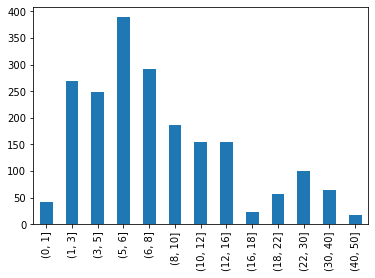

In [46]:
cc.value_counts().sort_index().plot(kind='bar')